# Sales Prediction Code
This notebook contains the code for the sales prediction project using Ridge Regression.

## Step 1: Import Necessary Packages
Import the required libraries for data manipulation, model training, and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Loading
Load the dataset using pandas.

In [2]:
data = pd.read_csv('datasets/Sales.csv')

## Step 3: Data Exploration
Explore the dataset to understand its structure and summary statistics.

In [3]:
print(data.head())
print(data.info())
print(data.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

## Step 4: Data Preprocessing
Handle missing values by filling them with the mean of the respective columns.

In [4]:
data.fillna(data.mean(), inplace=True)

## Step 5: Feature Selection
Select the features (independent variables) and the target variable.

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']  # Target variable

## Step 6: Model Selection and Training
Split the dataset into training and testing sets and train the Ridge Regression model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge(alpha=1.0)  # Using Ridge Regression
model.fit(X_train, y_train)

Ridge()

## Step 7: Model Evaluation
Evaluate the model's performance using Mean Squared Error (MSE) and R-squared metrics.

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 2.9077961073670484
R-squared: 0.9058999159458062


## Step 8: Residual Analysis
Calculate residuals and visualize them to assess the model's performance.

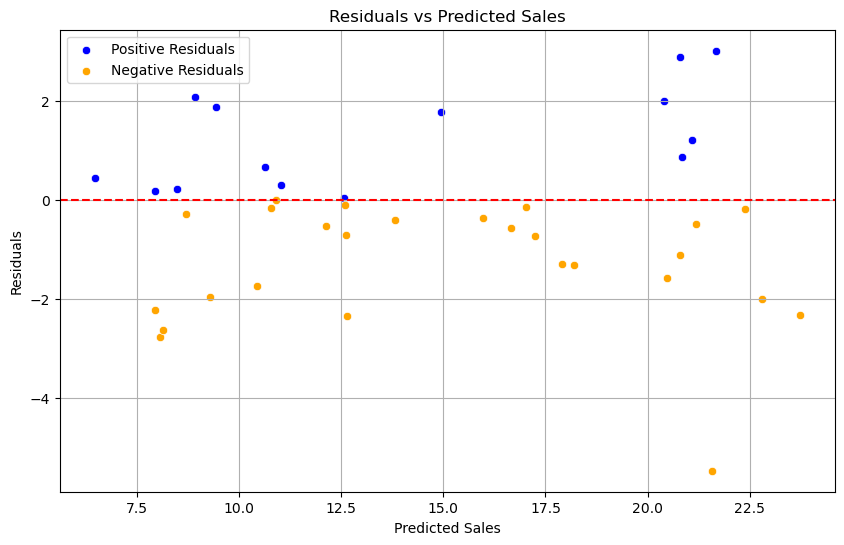

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred[residuals >= 0], y=residuals[residuals >= 0], color='blue', label='Positive Residuals')
sns.scatterplot(x=y_pred[residuals < 0], y=residuals[residuals < 0], color='orange', label='Negative Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.grid(True)
plt.legend()
plt.show()

## Step 9: Visualization
Create a scatter plot to compare actual sales against predicted sales.

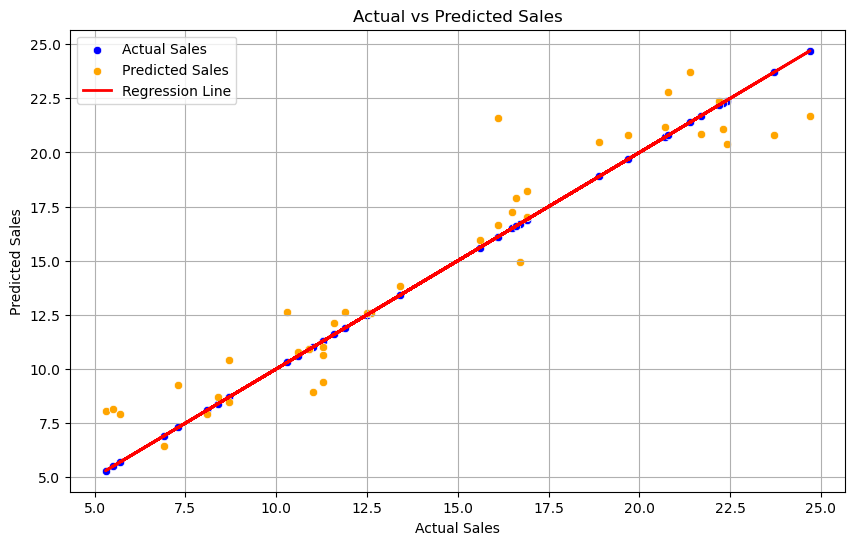

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Sales')  # Actual sales
sns.scatterplot(x=y_test, y=y_pred, color='orange', label='Predicted Sales')  # Predicted sales
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')  # Adding a regression line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)  # Adding a grid for better readability
plt.legend()
plt.show()